使用最小二乘法拟合：$$Z = aX + bY + c$$

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from mpl_toolkits.mplot3d import Axes3D

In [32]:
def model(params, x, y):
    a, b, c = params
    return a * x + b * y + c

In [33]:
def residuals(params, x, y, z_observed):
    return model(params, x, y) - z_observed

In [34]:
def generate_data(a_true, b_true, c_true, noise_level = 0.1, num_points = 50):
    np.random.seed(42)
    x = np.random.rand(num_points)
    y = np.random.rand(num_points)
    z_true = model([a_true, b_true, c_true], x, y)
    z_noisy = z_true + noise_level * np.random.randn(num_points)
    return x, y, z_noisy

In [35]:
a_true, b_true, c_true = 2.5, -1.3, 0.7
x, y, z_observed = generate_data(a_true, b_true, c_true)

In [36]:
def fit_least_squares(x, y, z_observed, initial_guess):
    result = least_squares(residuals, initial_guess, args = (x, y, z_observed))
    return result.x

In [37]:
initial_guess = [1.0, 1.0, 1.0]
params_optimal = fit_least_squares(x, y, z_observed, initial_guess)


In [38]:
print(f"真实参数: a={a_true}, b={b_true}, c={c_true}")
print(f"拟合参数: a={params_optimal[0]:.4f}, b={params_optimal[1]:.4f}, c={params_optimal[2]:.4f}")


真实参数: a=2.5, b=-1.3, c=0.7
拟合参数: a=2.3671, b=-1.3168, c=0.7695


In [39]:
def plot_results(x, y, z_observed, z_predicted, params_optimal):
    fig = plt.figure(figsize = (12, 6))

    ax = fig.add_subplot(111, projection = "3d")
    ax.scatter(x, y, z_observed, c = "red", label = "Observed Data")
    x_grid, y_grid = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
    z_grid = model(params_optimal, x_grid, y_grid)
    ax.plot_surface(x_grid, y_grid, z_grid, alpha = 0.5, color = "blue", label = "Fitted Plane")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Data and Fitted Plane')
    ax.legend()

    plt.tight_layout()
    plt.show()

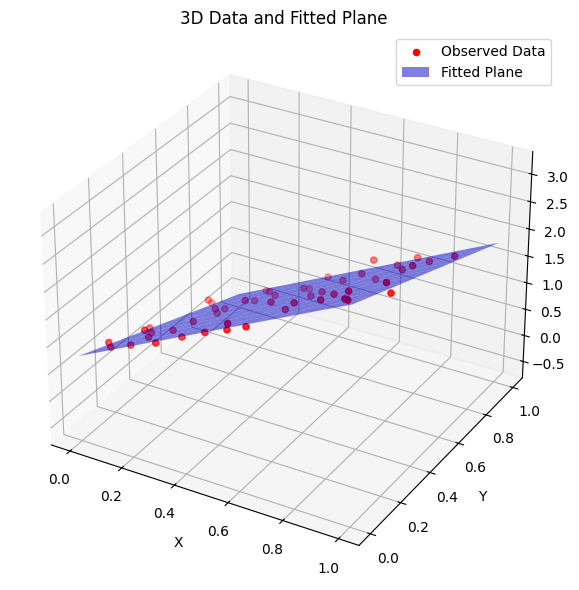

In [40]:
z_predicted = model(params_optimal, x, y)
plot_results(x, y, z_observed, z_predicted, params_optimal)